In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

WORLDX, WORLDY = 10, 6 

# Gradiente

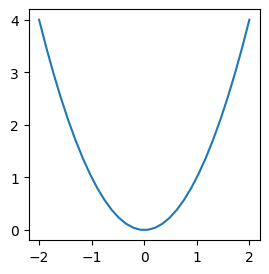

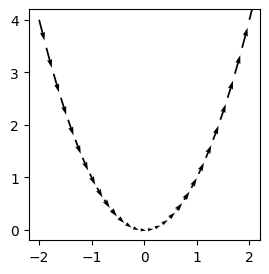

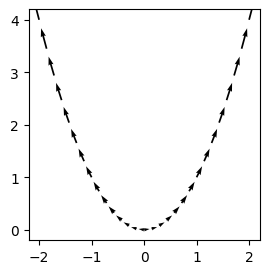

In [7]:
# Atenção com a ordem dos pontos
xn = np.linspace(0, -2, 15)
xp = np.linspace(0, 2, 15)
x =  np.linspace(-2, 2, 30)
y = x**2


fig = plt.figure(figsize=(6,3), dpi=100)
ax = fig.add_subplot(111, aspect='equal')
plt.plot(x, y)



dx = np.gradient(x)
dy = np.gradient(y)

fig = plt.figure(figsize=(6,3), dpi=100)
ax = fig.add_subplot(111, aspect='equal')
ax.quiver(x, y, dx, dy)



fig = plt.figure(figsize=(6,3), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

y = xn**2
dx = np.gradient(xn)
dy = np.gradient(y)
ax.quiver(xn, y, dx, dy)

y = xp**2
dx = np.gradient(xp)
dy = np.gradient(y)
ax.quiver(xp, y, dx, dy)

# Attraction force

(0.0, 6.0)

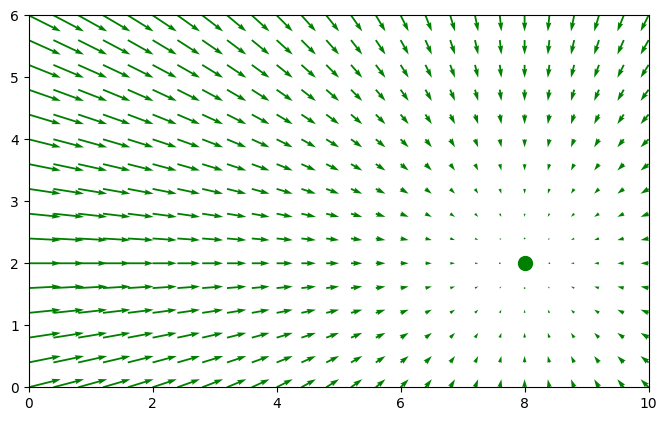

In [8]:
def att_force(q, goal, katt=.01):
    return katt*(goal - q)

goal = np.array([8, 2])

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

XX, YY = np.meshgrid(np.arange(0, WORLDX+.4, .4), np.arange(0, WORLDY+.4, .4))
XY = np.dstack([XX, YY]).reshape(-1, 2)

Fatt = att_force(XY, goal)
Fatt_x = Fatt[:,0]
Fatt_y = Fatt[:,1]

ax.quiver(XX, YY, Fatt_x, Fatt_y, color='g')

plt.plot(goal[0], goal[1], 'og', markersize=10)
    
ax.set_xlim(0, WORLDX)
ax.set_ylim(0, WORLDY)

# Repulsion force

(0.0, 6.0)

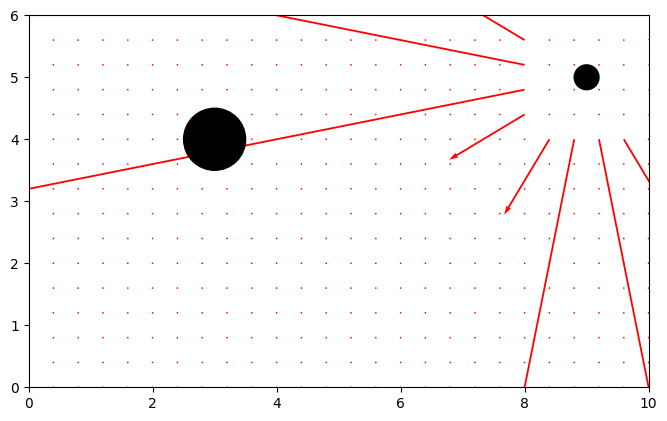

In [9]:
def rep_force(q, obs, R=3, krep=.1, axis=1):
    
    # Obstáculo: (x, y, r)
    v = q - obs[0:2]
    d = np.linalg.norm(v, axis=axis) - obs[2]
    d = d.reshape((len(v) ,1)) if axis==1 else d
    
    rep = (1/d**2)*((1/d)-(1/R))*(v/d)    
    
    invalid = np.squeeze(d > R)
    rep[invalid, :] = 0
    
    return krep*rep

# Obstáculo: (x, y, r)
obs = np.array([3, 4, .5])
obs2 = np.array([9, 5, .2])

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

Frep = rep_force(XY, obs) + rep_force(XY, obs2, 1)
Frep_x = np.copy(Frep[:,0])  # Cuidado com as referências
Frep_y = np.copy(Frep[:,1])  # Cuidado com as referências

# Threshold para visualização
fmax = 0.15
Fm = np.linalg.norm(Frep, axis=1)
Frep_x[Fm > fmax], Frep_y[Fm > fmax] = 0, 0

ax.quiver(XX, YY, Frep_x, Frep_y, color='r')
ax.add_patch(patches.Circle((obs[0], obs[1]), obs[2], color='k'))
ax.add_patch(patches.Circle((obs2[0], obs2[1]), obs2[2], color='k'))

ax.set_xlim(0, WORLDX)
ax.set_ylim(0, WORLDY)

# "Similação" Discreta

In [10]:
def multiplo04(numero):
    modulo=np.abs(numero)
    if numero>=0:
        return round((modulo - modulo%0.4 + 0.4), 2)
    else:
        return round((modulo - modulo%0.4 + 0.4), 2)*-1

robot=np.array([multiplo04(1),multiplo04(5)])
Ft = Fatt + Frep

# Normalização
# Ft = Ft / np.linalg.norm(Ft, axis=1).reshape((len(Ft), 1))
Ft_x = Ft[:,0]
Ft_y = Ft[:,1]

#Associando cada ponto do mapa à sua respectiva força através de um dicionário
forces = {}
for i in range(len(XY)):
    forces[round(XY[i][0], 2), round(XY[i][1], 2)] = Ft[i]

robx, roby=[], []
i=0
while True:
    robx.append(robot[0])
    roby.append(robot[1])
    if np.array_equal(robot, goal) or i>50:
        break
    robot[0]=round(robot[0]+multiplo04(forces[robot[0],robot[1]][0]), 2) if robot[0]+multiplo04(forces[robot[0],robot[1]][0]) <= WORLDX else WORLDX
    robot[1]=round(robot[1]+multiplo04(forces[robot[0],robot[1]][1]), 2) if robot[1]+multiplo04(forces[robot[0],robot[1]][0]) <= WORLDY else WORLDY
    i+=1

print(robx)
print(roby)

# Threshold para visualização
fmax = .15
Fm = np.linalg.norm(Ft, axis=1)
Ft_x[Fm > fmax], Ft_y[Fm > fmax] = 0, 0

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

ax.quiver(XX, YY, Ft_x, Ft_y, color='b')
plt.plot(goal[0], goal[1], 'og', markersize=10)
ax.add_patch(patches.Circle((obs[0], obs[1]), obs[2], color='k'))
ax.add_patch(patches.Circle((obs2[0], obs2[1]), obs2[2], color='k'))

plt.plot(robx, roby, color='r')

ax.set_xlim(0, WORLDX)
ax.set_ylim(0, WORLDY)

KeyError: (-297.6, 4.0)

# "Simulação" Contínua

(0.0, 6.0)

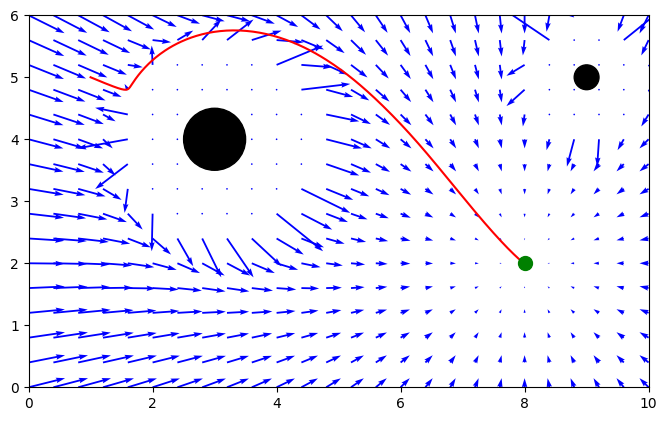

In [ ]:
robot=np.array([1,5])

Ft = Fatt + Frep

# Normalização
# Ft = Ft / np.linalg.norm(Ft, axis=1).reshape((len(Ft), 1))
Ft_x = Ft[:,0]
Ft_y = Ft[:,1]

# Threshold para visualização
fmax = .15
Fm = np.linalg.norm(Ft, axis=1)
Ft_x[Fm > fmax], Ft_y[Fm > fmax] = 0, 0

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')
plt.plot(robot[0], robot[1], 'red', markersize=10)

robpos = []
while np.linalg.norm(robot-goal) > 0.01:
    robpos.append(robot)
    robot = robot + att_force(robot, goal) + rep_force(robot, obs, 3, axis=None) + rep_force(robot, obs2, 3, axis=None)

robpos = np.array(robpos)
plt.plot(robpos[:,0], robpos[:,1], color='r')
ax.quiver(XX, YY, Ft_x, Ft_y, color='b')
plt.plot(goal[0], goal[1], 'og', markersize=10)
ax.add_patch(patches.Circle((obs[0], obs[1]), obs[2], color='k'))
ax.add_patch(patches.Circle((obs2[0], obs2[1]), obs2[2], color='k'))


ax.set_xlim(0, WORLDX)
ax.set_ylim(0, WORLDY)

# Repuslsion + Attraction force

(0.0, 6.0)

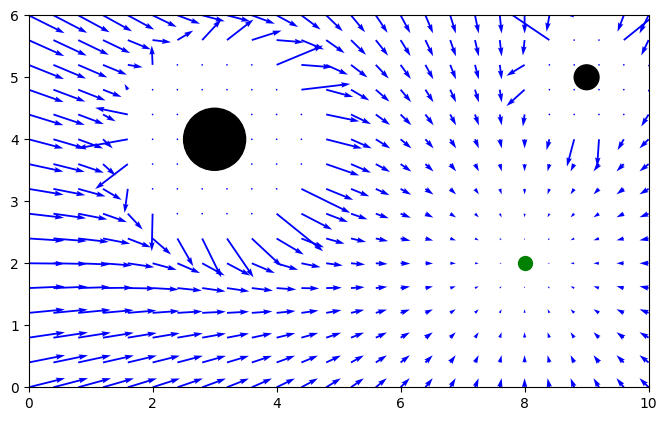

In [ ]:
Ft = Fatt + Frep

# Normalização
# Ft = Ft / np.linalg.norm(Ft, axis=1).reshape((len(Ft), 1))

Ft_x = Ft[:,0]
Ft_y = Ft[:,1]

# Threshold para visualização
fmax = .15
Fm = np.linalg.norm(Ft, axis=1)
Ft_x[Fm > fmax], Ft_y[Fm > fmax] = 0, 0

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

ax.quiver(XX, YY, Ft_x, Ft_y, color='b')
plt.plot(goal[0], goal[1], 'og', markersize=10)
ax.add_patch(patches.Circle((obs[0], obs[1]), obs[2], color='k'))
ax.add_patch(patches.Circle((obs2[0], obs2[1]), obs2[2], color='k')) 

ax.set_xlim(0, WORLDX)
ax.set_ylim(0, WORLDY)

# Tracking

(0.0, 6.0)

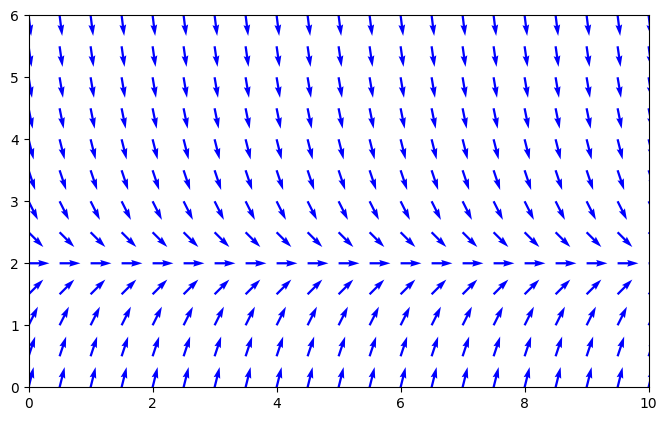

In [ ]:
def att_force(q, goal, k=2):
    f = k*(goal - q)
    f[:,0] = 1
    #f[:,1] = 0
    return f

goal = np.array([0, 2])

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

XX, YY = np.meshgrid(np.arange(0, WORLDX+.5, .5), np.arange(0, WORLDY+.5, .5))
XY = np.dstack([XX, YY]).reshape(-1, 2)

Fatt = att_force(XY, goal)
Fatt = Fatt / np.linalg.norm(Fatt, axis=1).reshape((len(Fatt), 1))

Fatt_x = Fatt[:,0]
Fatt_y = Fatt[:,1]

ax.quiver(XX, YY, Fatt_x, Fatt_y, color='b')
    
ax.set_xlim(0, WORLDX)
ax.set_ylim(0, WORLDY)

# Para praticar

- Alterar a função 'rep_force' para considerar múltiplos obstáculos (inclusive outros robôs).
- Fazer o cálculo "online" (baseado apenas na posição atual do robô).
- Aplicar a parte de controle e observar o robô navegando.
- Implementar a convergência para uma reta e em seguida um círculo.